In [242]:
%reset

In [272]:
import os, sys, random

import pandas as pd
import numpy as np
import swifter

import pacmagic
import pacmagic_icu


from importlib import reload
from data_warehouse_utils.dataloader import DataLoader

os.chdir('/home/adam/files/causal_inference')
os.getcwd()

from causal_inference.experiment_generator.create_observations import create_data_points
from causal_inference.experiment_generator.create_treatment import get_proning_table

In [260]:
dl = DataLoader()

In [3]:
count_admissions = _get_hash_patient_id(dl)
len(count_admissions)

1687

In [4]:
count_patients = dl.get_patients(columns=['hash_patient_id']).hash_patient_id.unique().tolist()
len(count_patients)

2053

In [5]:
count_treatment = dl.get_range_measurements(columns=['hash_patient_id']).hash_patient_id.unique().tolist()
len(count_treatment)


1722

In [ ]:
len(list(set(count_admissions).intersection(set(count_treatment))))

Getting the skeleton data

In [246]:
os.chdir('/home/adam/files/data')
os.getcwd()


'/home/adam/files/data'

In [247]:
df_treatment = pd.read_csv('prone_sessions.csv')
df_treatment.head()

,hash_patient_id,effective_value,session_id,is_correct_unit_yn,proning_canceled,start_timestamp,end_timestamp,duration_hours
0,0056C30A94364E6D71E41EF2F4611DE0FEDF1D86755991...,prone,1,True,False,2020-04-20 20:11:35,2020-04-27 15:29:45,163
1,0056C30A94364E6D71E41EF2F4611DE0FEDF1D86755991...,supine,0,True,False,2020-04-17 18:47:58,2020-04-20 20:11:35,73
2,0056C30A94364E6D71E41EF2F4611DE0FEDF1D86755991...,supine,2,True,False,2020-04-27 15:29:45,2020-05-06 20:20:29,220
3,0062A4D1F904E04A4B1FA417D87F71181AEB285660274A...,supine,0,False,False,2020-03-20 15:27:00,2020-03-20 22:18:00,6
4,0070A04E30F2A5F394E0EED71AE0C186DEAB514BD21D27...,Bed naar links,1,True,False,2020-05-13 04:00:00,2020-05-13 12:00:00,8


In [248]:
df_treatment['start_timestamp'] = df_treatment.start_timestamp.astype('datetime64[ns]')
df_treatment['end_timestamp'] = df_treatment.end_timestamp.astype('datetime64[ns]')
df_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   hash_patient_id     6866 non-null   object        
 1   effective_value     6866 non-null   object        
 2   session_id          6866 non-null   int64         
 3   is_correct_unit_yn  6866 non-null   bool          
 4   proning_canceled    6866 non-null   bool          
 5   start_timestamp     6866 non-null   datetime64[ns]
 6   end_timestamp       6866 non-null   datetime64[ns]
 7   duration_hours      6866 non-null   int64         
dtypes: bool(2), datetime64[ns](2), int64(2), object(2)
memory usage: 335.4+ KB


In [249]:
df_treatment = df_treatment[df_treatment.effective_value == 'prone']
df_treatment = df_treatment[df_treatment.duration_hours <= 96]

In [250]:
df_treatment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 11 to 6858
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   hash_patient_id     2531 non-null   object        
 1   effective_value     2531 non-null   object        
 2   session_id          2531 non-null   int64         
 3   is_correct_unit_yn  2531 non-null   bool          
 4   proning_canceled    2531 non-null   bool          
 5   start_timestamp     2531 non-null   datetime64[ns]
 6   end_timestamp       2531 non-null   datetime64[ns]
 7   duration_hours      2531 non-null   int64         
dtypes: bool(2), datetime64[ns](2), int64(2), object(2)
memory usage: 143.4+ KB


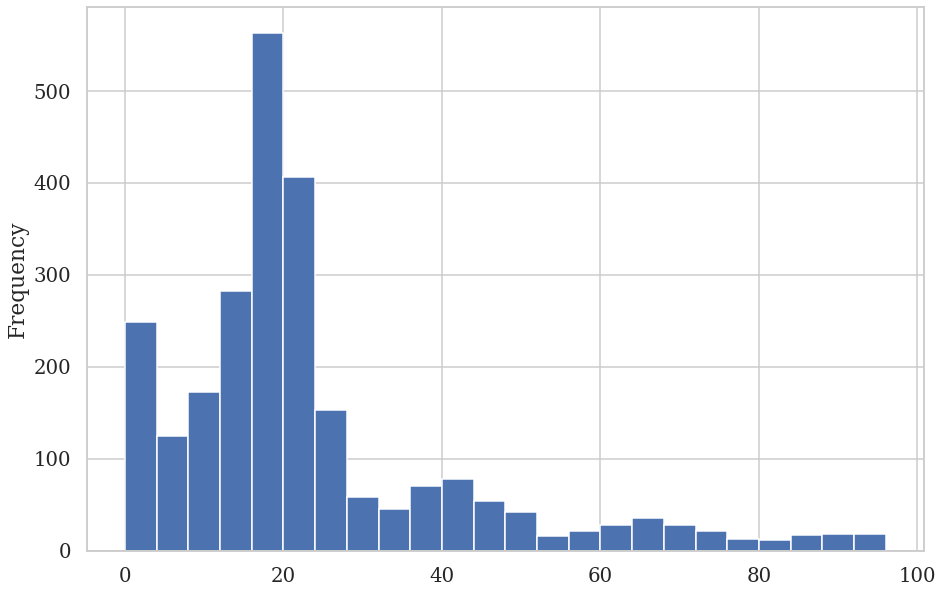

In [251]:
df_treatment.duration_hours.plot.hist(bins = 24)

In [309]:
df_sample = df_treatment.sample(5)

In [310]:
PARAMETERS = ['fio2', 'peep', 'po2_arterial']

Exception during reset or similar
Traceback (most recent call last):
  File "/home/adam/.conda/envs/python37/lib/python3.7/site-packages/pandas/io/sql.py", line 1586, in execute
    cur.execute(*args, **kwargs)
psycopg2.errors.AdminShutdown: terminating connection due to administrator command
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.


During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/adam/.conda/envs/python37/lib/python3.7/site-packages/pandas/io/sql.py", line 1590, in execute
    self.con.rollback()
psycopg2.InterfaceError: connection already closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/adam/files/data-warehouse-utils/data_warehouse_utils/api.py", line 142, in _execute_query
    params=params
  File "/home/adam/.conda/envs/python37/lib/python3

DatabaseError: Execution failed on sql: SQL('SELECT pacmed_name, pacmed_subname, numerical_value, effective_timestamp FROM processed.single_timestamp WHERE (hash_patient_id IN (%s)) AND (pacmed_name IN (%s, %s, %s)) AND (effective_timestamp >= %s) AND (effective_timestamp < %s)')
terminating connection due to administrator command
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.

unable to rollback

In [ ]:
df_measurements

In [ ]:
df_measurements.info()